We'll learn about the graphs we can use to compare multiple frequency distributions at once. We'll continue to work with the WNBA dataset. We've kept the `Exp_ordinal` variable we created in the last file

`library(dplyr)
 library(readr)`

`wnba <- read_csv("wnba (1).csv")`

**Task**

* Generate a frequency distribution table grouped by the `Pos` variable and then `Exp_ordinal`.

* Generate a frequency distribution table grouped by the `Exp_ordinal` variable and then `Pos`.

**Answer**

`exp_by_pos <- wnba %>% 
  group_by(Pos, Exp_ordinal) %>% 
  summarize(Freq = n())`

`pos_by_exp <- wnba %>% 
  group_by(Exp_ordinal, Pos) %>% 
  summarize(Freq = n())`

The purpose of the above exercise was to give us a sense about how cumbersome really is to compare multiple distributions at once using frequency tables. Fortunately, we can make the comparison much quicker and more efficiently using graphs.

All the frequency tables we wanted to compare were for the `Pos` variable, which is measured on a nominal scale. A simple solution to our problem is to generate a bar plot for each table, and then group all the bar plots on a single figure. The graph is called a **grouped bar plot**. 

We can generate a grouped bar plot just like the one above using the [`geom_bar()` geom](https://ggplot2.tidyverse.org/reference/geom_bar.html) from the `ggplot2` package. 

`library(ggplot2) `

`ggplot(data = wnba,
         aes(x = Exp_ordinal, fill = Pos)) +
  geom_bar(position = "dodge") +
  labs(x = "Experience Level",
       y = "Frequency")`
       
       
`position = "dodge"` - specifies that we want the bars for the position column side-by-side (not stacked).

We can generate the same bar chart using data from the frequency distribution table.

`exp_by_pos <- wnba %>% 
  group_by(Pos, Exp_ordinal) %>% 
  summarize(Freq = n())`


`ggplot(data = exp_by_pos,
         aes(x = Exp_ordinal, y = Freq, fill = Pos)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(x = "Experience Level",
       y = "Frequency")`

The `stat`, or statistical method, is changed from the default `count` to `identity`. This is because the `exp_by_pos` dataframe contains summary data, so `ggplot2` only needs to use the `"identity"` of the data rather than counting the frequencies first.

**Task**

Generate two indentical grouped bar plots by position on the x-axis, and specify experience level as the fill argument that creates the colored bars.


**Answer**

`library(ggplot2)`

`ggplot(data = wnba, 
         aes(x = Pos, fill = Exp_ordinal)) +
  geom_bar(position = "dodge", stat = "count") +
  labs(x = "Position",
       y = "Frequency")`

`ggplot(data = pos_by_exp,
         aes(x = Pos, y = Freq, fill = Exp_ordinal)) +
  geom_bar(position = "dodge", stat = "identity") +
  labs(x = "Position",
       y = "Frequency")`

On average, a WNBA player played approximately 497 minutes in the 2016-2017 season

`mean(wnba$MIN)`

[1] 496.972

Let's hypothesize that older players generally play less than this average of 497 minutes, while younger players generally play more. As a benchmark to distinguish between younger and older players, we'll take the mean age of players in our sample, which is approximately 27:

`mean(wnba$Age)`

[1] 27.07692

To test our hypothesis, we can generate a grouped bar plot to examine the frequency distribution of younger and older players that played under the average or as much as the average or above.

In the code below, we'll use the `if_else()` function from `dplyr` to apply the labeling logic above and `mutate()` to create the `age_relative` and `min_relative` columns.

`wnba <- wnba %>% 
  mutate(age_relative = 
         if_else(Age >= 27, "old", "young")) %>% 
  mutate(age_relative = 
         factor(age_relative, 
                levels = c("young", "old")))`

`wnba <- wnba %>% 
  mutate(min_relative = 
         if_else(MIN >= 497, "average or above", "below average")) %>% 
  mutate(min_relative = 
         factor(min_relative,
                levels = c("below average", "average or above")))`

**Task**

Generate a grouped bar plot to confirm or reject our hypothesis that older players generally play less than this average of 497 minutes, while younger players generally play more.

**Answer**

`ggplot(data = wnba, 
       aes(x = age_relative, fill = min_relative)) +
  geom_bar(position = "dodge")`

`result <- 'reject'`

A shortcoming of our analysis so far is that the `min_relative` variable doesn't show much granularity. We can see that more old players belong to the "average or above" category than to "below average", but we can't tell, for instance, whether old players generally play much more than the average. For all we know, they could have all played exactly 497 minutes (which is the average).

The `min_relative` variable is ordinal, and it was derived from the `MIN` variable, which is measured on a ratio scale. The information provided by the `MIN` variable is much more granular, and we can plot the distribution of this variable instead. Because the `MIN` variable is measured on a ratio scale, we'll need to use histograms instead of bar plots. Here is the code to generate a histogram with `MIN` on the x-axis. The `geom_histogram()` default position is to stack the bars on top of each other, so when we set `fill = age_relative` the bars for each category are stacked on top of each other:

`ggplot(data = wnba,
         aes(x = MIN, fill = age_relative)) +
  geom_histogram(bins = 10)`

With the stacked bar charts it is difficult to compare the distribution of the two age categories. An easy way to compare two histograms is to superimpose one on top of the other. Specifying `position = "identity"` will cause the histograms to overlap, so we set `alpha = 0.5` to make each histogram transparent:

`ggplot(data = wnba,
         aes(x = MIN, fill = age_relative)) +
  geom_histogram(bins = 10, 
                 position = "identity", 
                 alpha = 0.5)`

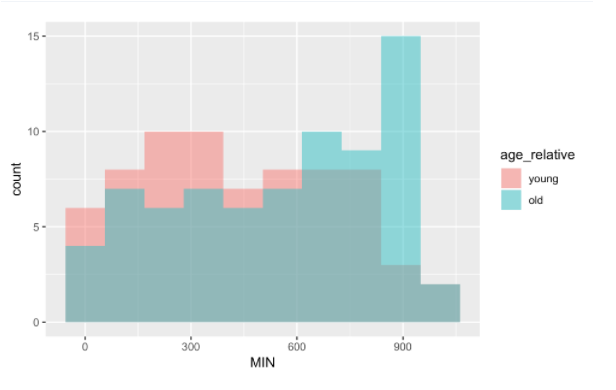

We can now infer that most of the old players that belong to the "average or above" category play significantly more than average. But this graphic could be improved by adding a vertical line to show the average number of minutes played. 

Adding a vertical line to show the average number of minutes played will be useful to vizualize minutes played by age category relative to the mean. We used `geom_hline()` to add a horizontal reference line. To add a vertical reference line we use the [`geom_vline()` geom](https://ggplot2.tidyverse.org/reference/geom_abline.html):

`ggplot(data = wnba,
         aes(x = MIN, fill = age_relative)) +
  geom_histogram(bins = 10, 
                 position = "identity", 
                 alpha = 0.5) +
  geom_vline(aes(xintercept = mean(wnba$MIN), 
                 linetype = "Average minutes"), 
             color = "black")`

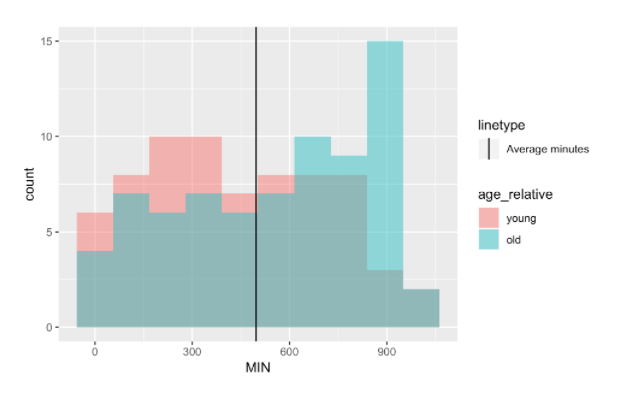

Another way to compare histogram distributions is to use the [`facet_wrap()` geom](https://ggplot2.tidyverse.org/reference/facet_wrap.html) to display plots side-by-side or in a grid pattern. Facet wrap is suitable in this case because we are comparing only two distributions, but this approach becomes less effective when comparing many distributions. To facet wrap by the `age_relative` category, we simply add `+ facet_wrap(~ age_relative)` to the code snippet above:

`ggplot(data = wnba,
         aes(x = MIN, fill = age_relative)) +
  geom_histogram(bins = 10, 
                 position = "identity", 
                 alpha = 0.5) +
  geom_vline(aes(xintercept = mean(wnba$MIN), 
                 linetype = "Average minutes"), 
             color = "black") +
  facet_wrap(~ age_relative)`

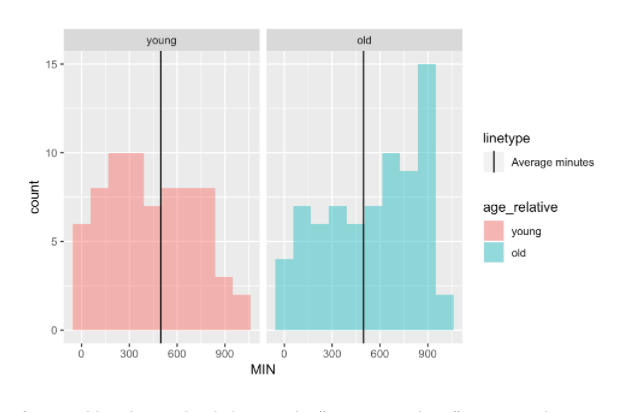

If many older players that belong to the "average or above" category play significantly more than average, it is reasonable to hypothesize that this group will also dominate the upper end of the points scored distribution.

**Task**

Generate a superimposed histogram (not stacked) showing the distribution of points scored for the two `age_relative` categories with and without **Facet Wrap**.

**Answer**

`ggplot(data = wnba,
         aes(x = PTS, fill = age_relative)) +
  geom_histogram(bins = 10, 
                 position = "identity", 
                 alpha = 0.5) +
  geom_vline(aes(xintercept = mean(wnba$PTS), 
                 linetype = "Average points"), 
             color = "black")`


`ggplot(data = wnba,
         aes(x = PTS, fill = age_relative)) +
  geom_histogram(bins = 10, 
                 position = "identity", 
                 alpha = 0.5) +
  geom_vline(aes(xintercept = mean(wnba$PTS), 
                 linetype = "Average points"), 
             color = "black") +
  facet_wrap(~ age_relative)`

The overlayed histograms we built made it possible to see clearly both distributions. But the graph looked a bit overcrowded:

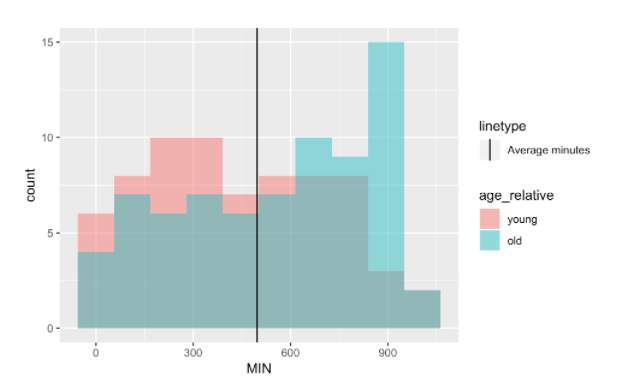

If we added more histograms to the graph above, it would become highly unreadable, and it'd be difficult to see any clear patterns. One solution to this problem is to display counts with lines instead of bars. This is called a **frequency polygon** and in `ggplot2` this is implemented with the [`geom_freqploy()` geom](https://ggplot2.tidyverse.org/reference/geom_histogram.html). Frequency polygons may be more suitable when we want to compare distributions across levels of a categorical variable:

`ggplot(data = wnba,
         aes(x = MIN, color = age_relative)) +
  geom_freqpoly(bins = 10, 
                 position = "identity") +
  geom_vline(aes(xintercept = mean(wnba$MIN), 
                 linetype = "Average minutes"), 
             color = "black")`
             
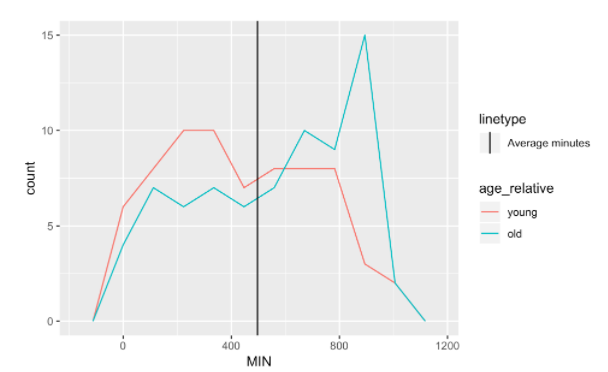

The code is nearly identical to that used to generate the overlaid bar charts, except we use `geom_freqpoly()` instead of `geom_histogram()`. Line color is specified with the `color` aesthetic, not `fill`. And we do not need to specify an `alpha` here.

Another approach is to smooth out the shape of the histograms to make them look less dense on the graph. This is how a single histogram would look smoothed out:

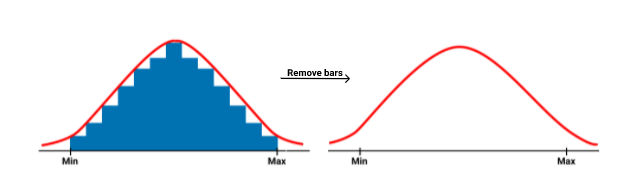

We can smooth out our two histograms above for old and young players using the [`geom_density()` geom](https://ggplot2.tidyverse.org/reference/geom_density.html). The default `position` for density plots is "identity", or "overlaid", so we do not need to specify an argument here:

`ggplot(data = wnba,
         aes(x = MIN, color = age_relative)) +
  geom_density() +
  geom_vline(aes(xintercept = mean(wnba$MIN), 
                 linetype = "Average minutes"), 
             color = "black")`
             
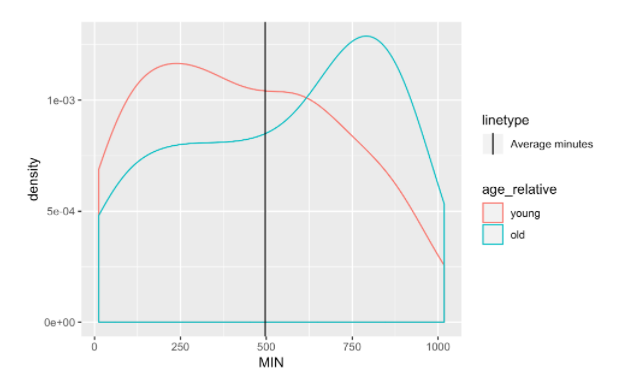

Each of the smoothed histograms above is called a **kernel density estimate plot** or, shorter, **kernel density plot**. These are also known as smoothed density estimates. Unlike histograms, kernel density plots display densities on the y-axis instead of frequencies. The density values are actually probability values.

**Task**

Generate a kernel density plot for the `PTS` variable, and add a vertical line to demarcate the average number of points scored.

* The vertical line should be around point 202 on the x-axis.
* Label the vertical line 'Average points' and make sure the label is displayed in the legend.

**Answer**

`ggplot(data = wnba,
         aes(x = PTS, color = age_relative)) +
  geom_density() +
  geom_vline(aes(xintercept = mean(wnba$PTS), 
                 linetype = "Average points"), 
             color = "black")`

Grouped bar plots are ideal for variables measured on nominal and ordinal scales. For variables measured on a ratio or interval scale, we learned that kernel density plots are a good solution when we have many distributions to compare. However, kernel density plots may become difficult to comprehend as we reach five distributions or more.

Let's say we're interested in analyzing the distribution of player height as a function of player position. In other words, we want to figure out, for instance, whether centers are generally taller than forwards, whether forwards are generally shorter than guards, and so on. In the code below, we see that this can be generated easily with `ggplot2`:

`ggplot(data = wnba,
         aes(x = Height, color = Pos)) +
  geom_density()`
  
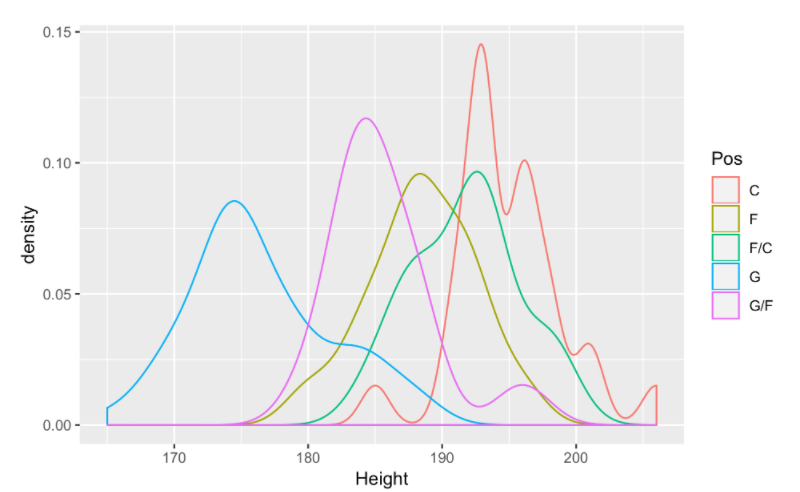

If we look very closely, we can see a couple of clear patterns: the shortest players are generally guards, the tallest players are generally centers, mid-height players are generally forwards or play in a combined position, etc.

Having to look very closely to a graph to identify obvious patterns is far from ideal. If there's any pattern, we want to see it immediately. To overcome this problem, we can use other kinds of graphs, which present the same information in a more readable way. 

One alternative we can use to visualize the distribution of heights as a function of player position is this style of scatterplot where each category is prepresented independently on the x-axis. This style of scatter plot is sometimes called a **strip plot**.

To generate the strip plots, we can use the [`geom_point()` geom](https://ggplot2.tidyverse.org/reference/geom_point.html) from `ggplot2`. 

`ggplot(data = wnba,
         aes(x = Pos, y = Height, color = Pos)) + 
  geom_point()`
  
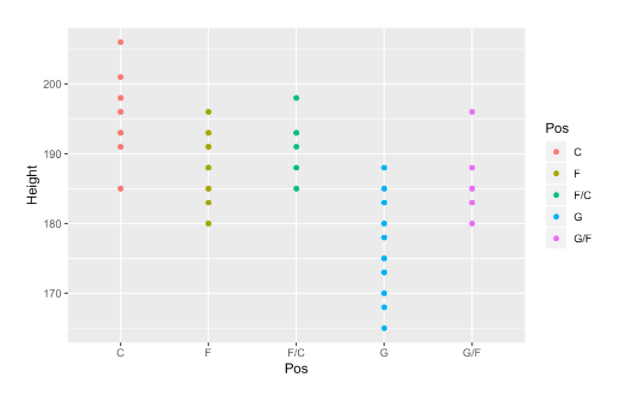

Patterns are now immediately visible. We can see on the graph that the shortest players are guards — in fact, all players under 180 cm are guards. The tallest players are centers — this is the only category with players above 2 meters. Among combined positions, we can see that F/C has slightly taller representatives — most likely because it requires center qualities (and we've seen that the tallest players are generally centers).

A downside of this scatter plot is that the bullet points overlap. We can fix this by adding a bit of jitter to each distribution. Jitter spreads the points out by applying a small amount of random noise to each point. We can do this by adding the [`geom_jitter()` layer](https://ggplot2.tidyverse.org/reference/geom_jitter.html) to the code:

`ggplot(data = wnba,
       aes(x = Pos, y = Height, color = Pos)) + 
  geom_point() +
  geom_jitter()`
  
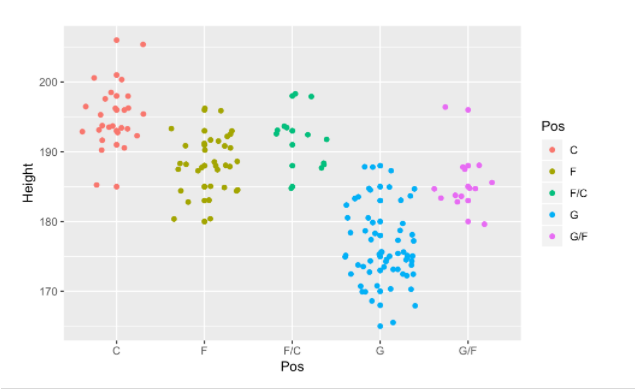

As mentioned above, strip plots are a style of scatter plot. When one of the variables is nominal or ordinal (often referred to as categorical in R), a scatter plot will generally take the form of a series of narrow strips. The number of narrow strips will be the same as the number of unique categories in the nominal or ordinal variable.

**Task**

Using scatter plots, examine the distribution of player weight (not height) as a function of player position.

**Answer**

`ggplot(data = wnba,
       aes(x = Pos, y = Weight, color = Pos)) + 
  geom_point() +
  geom_jitter()`

Besides scatter plots, there's another kind of graph we can use to display many distributions at once and make sure everything is still readable. Below, we use this kind of graph to plot again the distribution of player height as a function of player position:

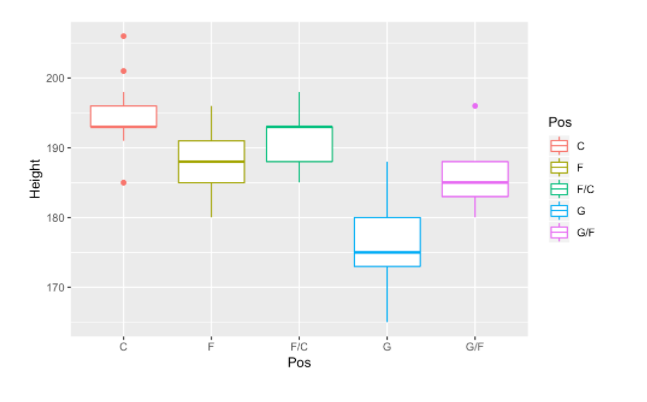

The two lines extending upwards and downwards out of the box in the middle look a bit like two whiskers, reason for which we call this plot a **box-and-whisker plot**, or, more convenient, just **box plot**.

We can generate the box plots above using the [`geom_boxplot()` geom](https://ggplot2.tidyverse.org/reference/geom_boxplot.html). On the x-axis we want the `Pos` variable, on the y-axis the `Height` variable, and we color by `Pos`:

`ggplot(data = wnba,
         aes(x = Pos, y = Height, color = Pos)) + 
  geom_boxplot()`

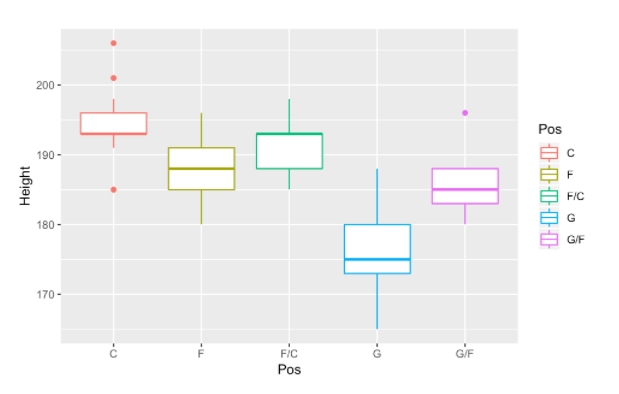

**Task**

Using `geom_boxplot()`, generate a series of box plots to examine the distribution of player **weight** as a function of player **position**.

**Answer**

`ggplot(data = wnba,
         aes(x = Pos, y = Weight, color = Pos)) + 
  geom_boxplot()`

The few dots we see for the box plots of centers and guards/forwards (G/F) represent values in the distribution that are much larger or much lower than the rest of the values. A value that is much lower or much larger than the rest of the values in a distribution is called an **outlier**.

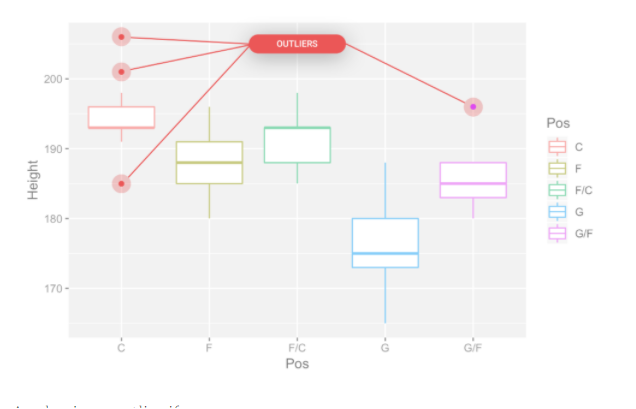

A value is an outlier if:

* It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the **interquartile range**).
* It's lower than the lower quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the **interquartile range**).

This formal definition of an outlier is arbitrary, and it could be changed if we wanted to. For any given distribution, the upper and lower quartiles, and the interquartile range remain constant. However, the 1.5 factor can vary. If the factor is increased, then the range outside which values are considered outliers increases as well. If the factor is decreased, the range outside which values are considered outlier decreases as well.

When we generate boxplots, we can increase or decrease this factor by using the `coef` argument of the [`geom_boxplot()` geom](https://ggplot2.tidyverse.org/reference/geom_boxplot.html). This is the same height distribution for all positions without any outliers because `coef = 4`:

`ggplot(data = wnba,
         aes(x = Pos, y = Height, color = Pos)) + 
  geom_boxplot(coef = 4)`
  
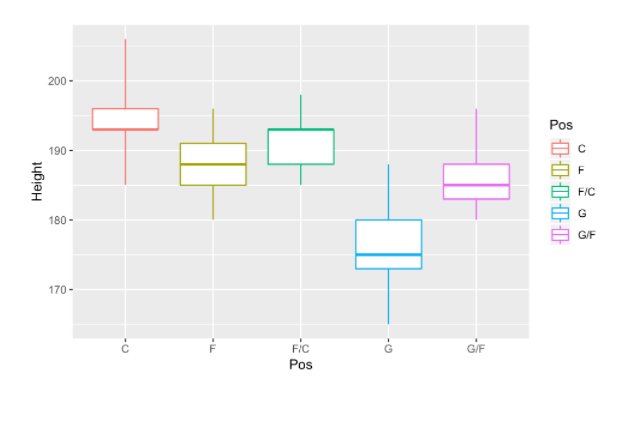

**Task**

Consider the `Games_Played` variable to replicate above example.

* Consider quartiles of the Games_Played variable:

`summary(wnba$Games_Played)`

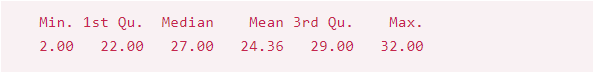

**Answer**

`iqr <- 29 - 22`

`lower_bound <- 22 - (1.5 * iqr)`

`upper_bound <- 29 + (1.5 * iqr)`

`outliers_low <- sum(wnba$Games_Played < lower_bound)` # True values will count as 1 in the summation

`outliers_high <- sum(wnba$Games_Played > upper_bound)`

`ggplot(data = wnba,
         aes(x = "", y = Games_Played, group = 1)) + 
  geom_boxplot()`